In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_hals_parafac_normalization_comparison import *
np.set_printoptions(precision=3)

#tensor
array = np.random.randn(30, 40, 20)
tensor = tl.tensor(array,dtype='float32')
tensor2 = tl.tensor(1e6*array,dtype='float32')


#parameters
init='svd'
svd='numpy_svd'
rank=5

normalization_functions=[nn_hals_normalize1, nn_hals_normalize2, 
                         nn_hals_normalize3, 
                         nn_hals_normalize4]
time_cp = tl.zeros([4, 20, 2])
errors1 = []
weights1 = []
errors2 = []
weights2 = []
rec_errors = tl.zeros([4, 20, 2])

1. Normalization at each outer loop (PR)
2. Normalization at each inner loop iteration (last factor is normalized after error calculation)
3. Normalization at the very end
4. 2 and 3 together

In [2]:
for j in range(20):
  for i in range(4):
     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j, 0] = time.time()-tic
     rec_errors[i, j, 0] = RMSE(tensor,cp_reconstructionnorm)
     
     if j==19:
        weights1.append(weights_iter)
        errors1.append(errorsnorm)

     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor2, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j, 1] = time.time()-tic
     rec_errors[i, j, 1] = RMSE(tensor,cp_reconstructionnorm)
    
     if j==19:
        weights2.append(weights_iter)
        errors2.append(errorsnorm)

# Error per iteration 

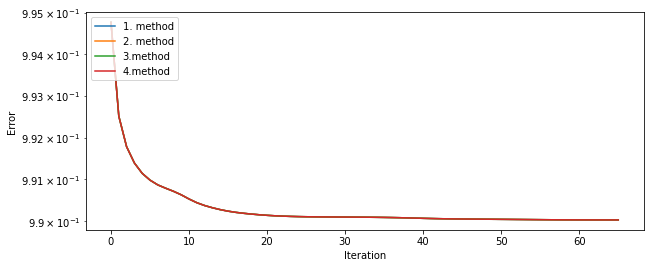

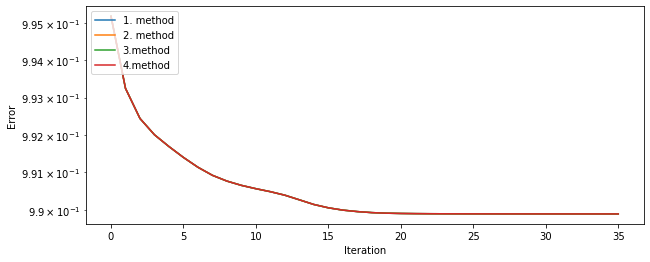

In [3]:
each_iteration(errors1[0], errors1[1], errors1[2], errors1[3])
each_iteration(errors2[0], errors2[1], errors2[2], errors2[3])

# Plotting weights per iteration for each method 

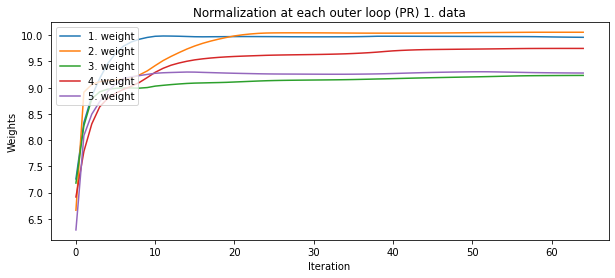

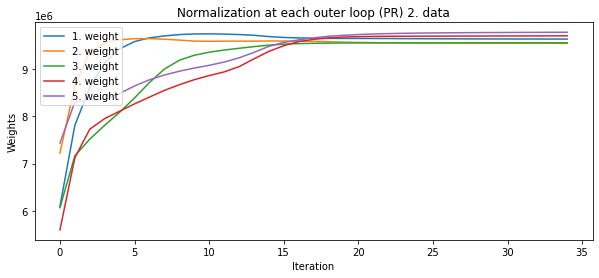

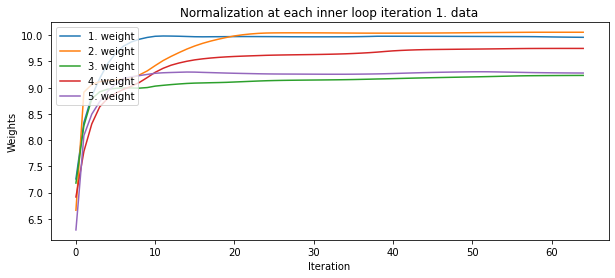

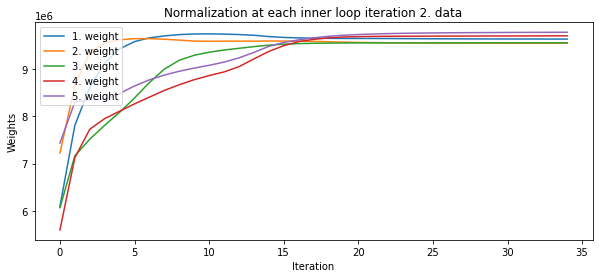

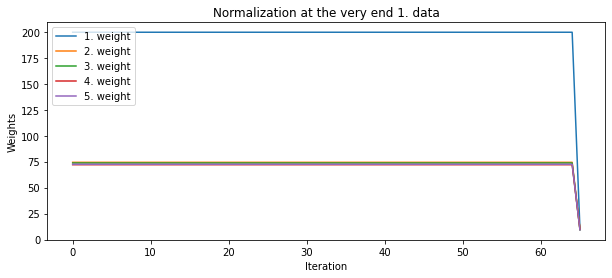

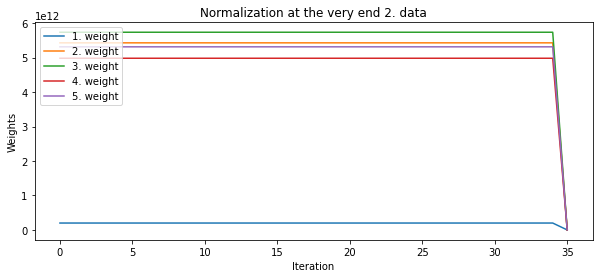

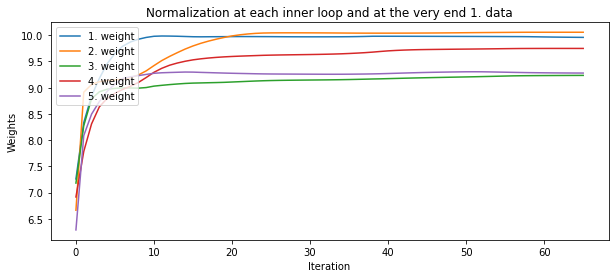

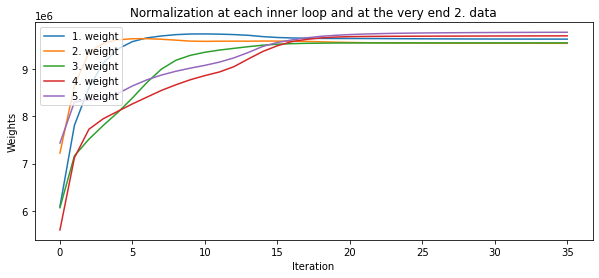

In [4]:
plot_weights(weights1[0], "Normalization at each outer loop (PR) 1. data")
plot_weights(weights2[0], "Normalization at each outer loop (PR) 2. data")
plot_weights(weights1[1], "Normalization at each inner loop iteration 1. data")
plot_weights(weights2[1], "Normalization at each inner loop iteration 2. data")
plot_weights(weights1[2], "Normalization at the very end 1. data")
plot_weights(weights2[2], "Normalization at the very end 2. data")
plot_weights(weights1[3], "Normalization at each inner loop and at the very end 1. data")
plot_weights(weights2[3], "Normalization at each inner loop and at the very end 2. data")

# Last weights

In [5]:
print("1. Data;")
print("1. Method:"+ str(weights1[0][-1]))
print("2. Method:"+ str(weights1[1][-1]))
print("3. Method:"+ str(weights1[2][-1]))
print("4. Method:"+ str(weights1[3][-1]))
print("2. Data;")
print("1. Method:"+ str(weights2[0][-1]))
print("2. Method:"+ str(weights2[1][-1]))
print("3. Method:"+ str(weights2[2][-1]))
print("4. Method:"+ str(weights2[3][-1]))

1. Data;
1. Method:[ 9.961 10.058  9.234  9.749  9.28 ]
2. Method:[ 9.961 10.058  9.234  9.749  9.28 ]
3. Method:[ 9.96  10.058  9.235  9.749  9.279]
4. Method:[ 9.96  10.058  9.235  9.749  9.279]
2. Data;
1. Method:[9634568. 9546084. 9555078. 9703052. 9779087.]
2. Method:[9634567. 9546083. 9555078. 9703051. 9779086.]
3. Method:[9634301. 9545546. 9555141. 9703573. 9780030.]
4. Method:[9634301. 9545544. 9555139. 9703571. 9780031.]


# Mean and standard deviation of reconstruction error

In [6]:
print("1. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :, 0])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :, 0])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :, 0])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :, 0])))                     
print("2. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :, 1])))                     
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :, 1])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :, 1])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :, 1])))                     

1. Data;
1. Method: 0.993 0.000
2. Method: 0.993 0.000
3. Method: 0.993 0.000
4. Method: 0.993 0.000
2. Data;
1. Method: 142198.388 0.007
2. Method: 142198.393 0.007
3. Method: 142198.388 0.006
4. Method: 142198.418 0.130


# Mean and standard deviation of processing time

In [7]:
print("1. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[0, :, 0])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[1, :, 0])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[2, :, 0])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[3, :, 0])))                     
print("2. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[0, :, 1])))                     
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[1, :, 1])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[2, :, 1])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[3, :, 1])))                     

1. Data;
1. Method: 0.425 0.049
2. Method: 0.441 0.047
3. Method: 0.412 0.043
4. Method: 0.452 0.048
2. Data;
1. Method: 0.230 0.028
2. Method: 0.251 0.023
3. Method: 0.228 0.025
4. Method: 0.251 0.036
